In [48]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load data
data = pd.read_csv('cosmos_db_export_edited.csv')
print(data.head())


                                id                   timestamp  test_field  \
0               unique-test-id-123  2024-11-30T16:54:41.764723  test_value   
1           unique-combined-id-456  2024-11-30T16:58:17.317723         NaN   
2       test-additional-fields-789  2024-11-30T17:02:40.856254  test_value   
3             test-nested-data-101  2024-11-30T17:04:06.956933  test_value   
4  data-2024-11-30T17:16:43.060040  2024-11-30T17:16:43.060048         NaN   

                       _rid  \
0  hCl+AN3ccB8BAAAAAAAAAA==   
1  hCl+AN3ccB8CAAAAAAAAAA==   
2  hCl+AN3ccB8DAAAAAAAAAA==   
3  hCl+AN3ccB8EAAAAAAAAAA==   
4  hCl+AN3ccB8FAAAAAAAAAA==   

                                               _self  \
0  dbs/hCl+AA==/colls/hCl+AN3ccB8=/docs/hCl+AN3cc...   
1  dbs/hCl+AA==/colls/hCl+AN3ccB8=/docs/hCl+AN3cc...   
2  dbs/hCl+AA==/colls/hCl+AN3ccB8=/docs/hCl+AN3cc...   
3  dbs/hCl+AA==/colls/hCl+AN3ccB8=/docs/hCl+AN3cc...   
4  dbs/hCl+AA==/colls/hCl+AN3ccB8=/docs/hCl+AN3cc...   

       

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

filtered_data = data[data['timestamp'] >= '2024-12-03']

/var/folders/ws/mh28fybn6dq48jvryxctyt2r0000gn/T/ipykernel_74855/1384979251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['traffic_time_smoothed'] = filtered_data['traffic_data.duration_in_traffic'].rolling(window=10).mean()
/var/folders/ws/mh28fybn6dq48jvryxctyt2r0000gn/T/ipykernel_74855/1384979251.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['air_quality_smoothed'] = filtered_data['air_quality_data.air_quality_index'].rolling(window=10).mean()


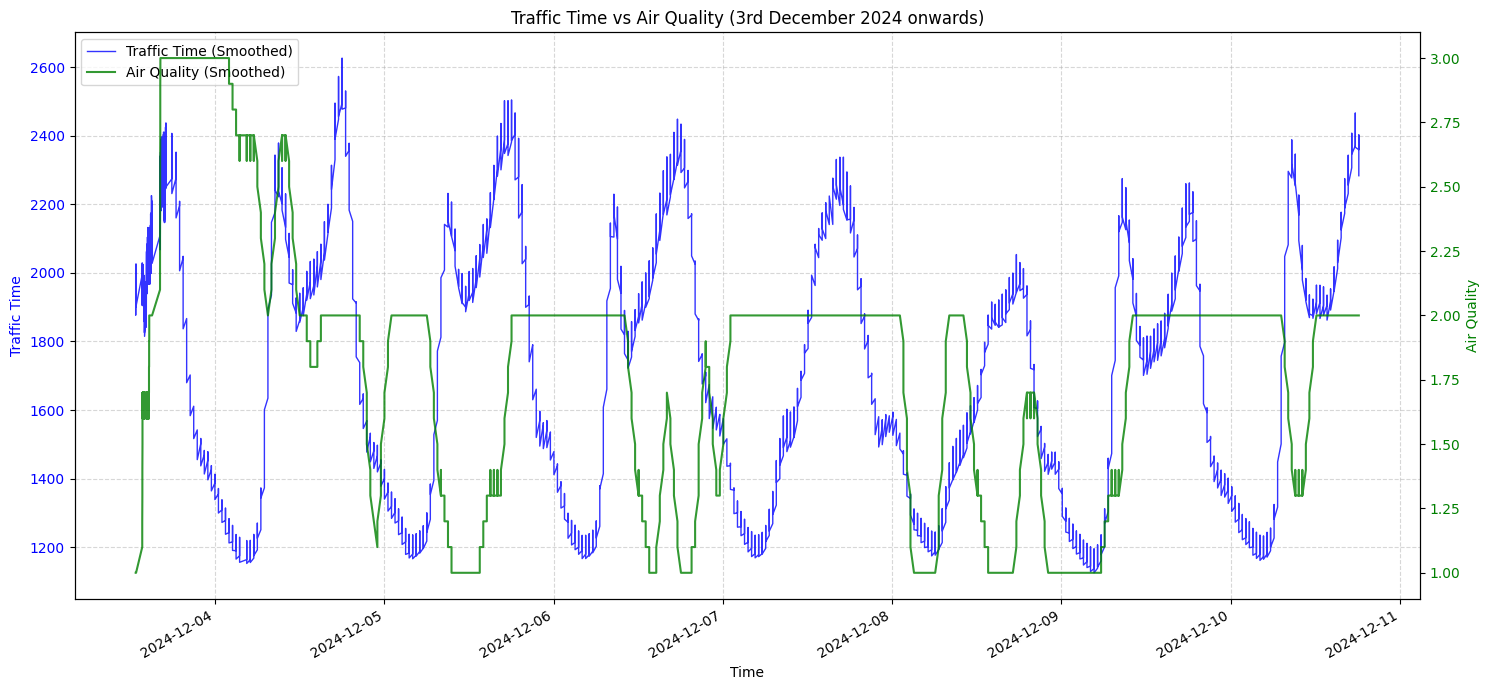

In [52]:
import matplotlib.pyplot as plt

# Apply rolling averages for smoother trends
filtered_data['traffic_time_smoothed'] = filtered_data['traffic_data.duration_in_traffic'].rolling(window=10).mean()
filtered_data['air_quality_smoothed'] = filtered_data['air_quality_data.air_quality_index'].rolling(window=10).mean()

# Create the dual-axis plot
fig, ax1 = plt.subplots(figsize=(15, 7))

# Plot traffic time on the left y-axis
ax1.plot(
    filtered_data['timestamp'], 
    filtered_data['traffic_time_smoothed'], 
    color='blue', linewidth=1, label='Traffic Time (Smoothed)', linestyle='-', alpha=0.8
)
ax1.set_xlabel('Time')
ax1.set_ylabel('Traffic Time', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot air quality on the right y-axis
ax2 = ax1.twinx()
ax2.plot(
    filtered_data['timestamp'], 
    filtered_data['air_quality_smoothed'], 
    color='green', linewidth=1.5, label='Air Quality (Smoothed)', linestyle='-', alpha=0.8
)
ax2.set_ylabel('Air Quality', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add gridlines to improve readability
ax1.grid(True, linestyle='--', alpha=0.5)

# Add a combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# Format x-axis for better readability
plt.gcf().autofmt_xdate()  # Automatically format x-axis for datetime
plt.xticks(rotation=45)

# Add title
plt.title('Traffic Time vs Air Quality (3rd December 2024 onwards)')

# Ensure layout is adjusted to avoid overlaps
fig.tight_layout()

# Show the plot
plt.show()


In [53]:
# Pearson's Correlation Coefficient
correlation_coefficient = filtered_data['air_quality_data.air_quality_index'].corr(filtered_data['traffic_data.duration_in_traffic'])
print(correlation_coefficient)

0.10471305515602648


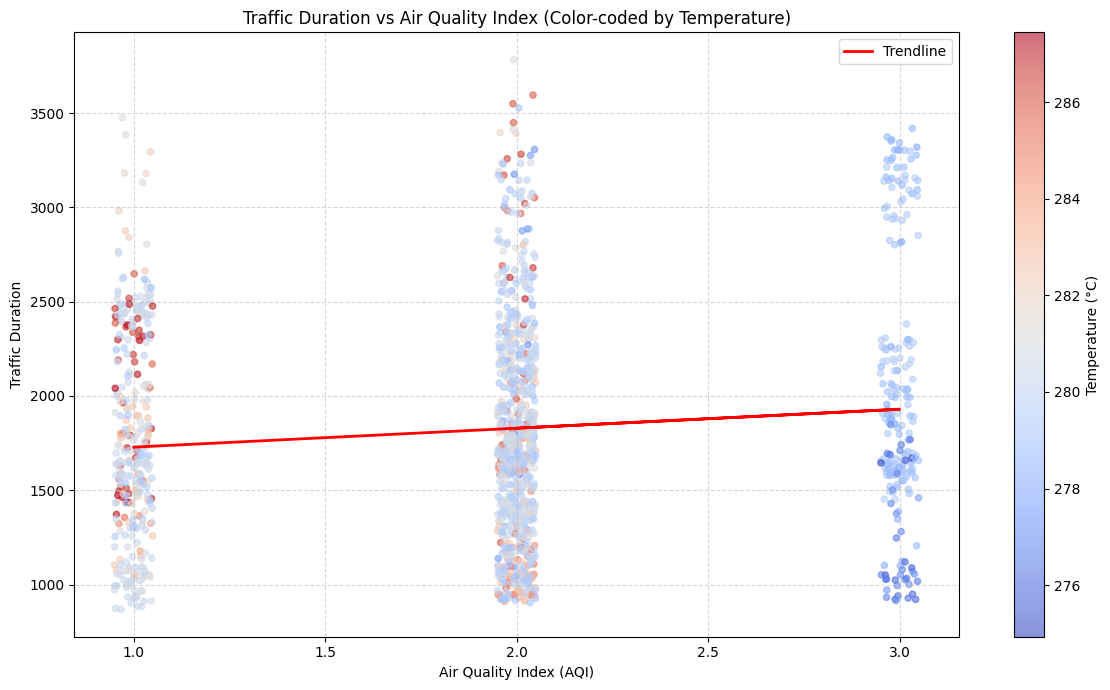

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Add jitter to AQI values for better visibility
jittered_aqi = filtered_data['air_quality_data.air_quality_index'] + np.random.uniform(-0.05, 0.05, size=len(filtered_data))

# Create the scatter plot with color coding
plt.figure(figsize=(12, 7))  # Increase figure size for better readability
scatter = plt.scatter(
    jittered_aqi, 
    filtered_data['traffic_data.duration_in_traffic'], 
    c=filtered_data['weather_data.temperature'],  # Color-coded by temperature
    cmap='coolwarm',  # Colormap for temperature
    alpha=0.6,  # Transparency
    s=20  # Marker size
)

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Temperature (°C)')

# Add a trendline
z = np.polyfit(
    filtered_data['air_quality_data.air_quality_index'], 
    filtered_data['traffic_data.duration_in_traffic'], 
    1  # Degree of the polynomial (linear trendline)
)
p = np.poly1d(z)
plt.plot(
    filtered_data['air_quality_data.air_quality_index'], 
    p(filtered_data['air_quality_data.air_quality_index']), 
    color='red', 
    linewidth=2, 
    label='Trendline'
)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add labels, title, and legend
plt.xlabel('Air Quality Index (AQI)')
plt.ylabel('Traffic Duration')
plt.title('Traffic Duration vs Air Quality Index (Color-coded by Temperature)')
plt.legend()

# Ensure proper layout
plt.tight_layout()

# Show the plot
plt.show()


In [55]:
# Spearman's Rank Correlation Coefficient
correlation_coefficient = filtered_data['air_quality_data.air_quality_index'].corr(filtered_data['traffic_data.duration_in_traffic'], method='spearman')
print(correlation_coefficient)

0.07023955388024704


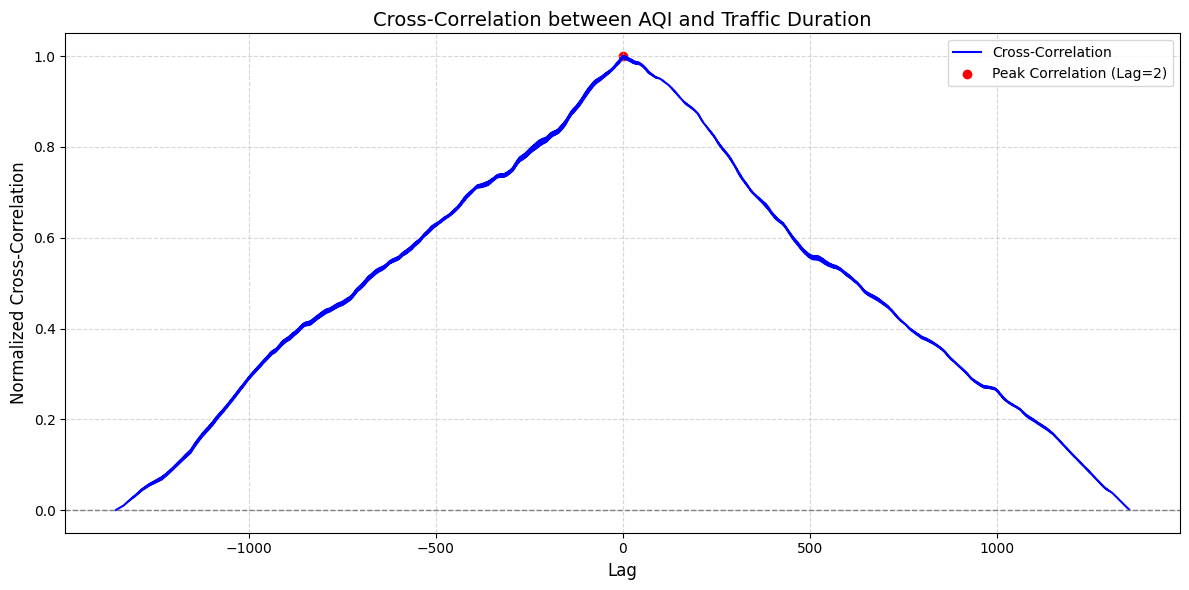

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Compute cross-correlation
cross_correlation = np.correlate(
    filtered_data['air_quality_data.air_quality_index'], 
    filtered_data['traffic_data.duration_in_traffic'], 
    mode='full'
)

# Normalize cross-correlation
cross_correlation_normalized = cross_correlation / np.max(np.abs(cross_correlation))

# Define lags
lags = np.arange(-len(filtered_data['traffic_data.duration_in_traffic']) + 1, len(filtered_data['air_quality_data.air_quality_index']))

# Plot cross-correlation
plt.figure(figsize=(12, 6))
plt.plot(lags, cross_correlation_normalized, color='blue', linewidth=1.5, label='Cross-Correlation')

# Highlight the peak
max_corr = np.max(cross_correlation_normalized)
max_lag = lags[np.argmax(cross_correlation_normalized)]
plt.scatter(max_lag, max_corr, color='red', label=f'Peak Correlation (Lag={max_lag})')

# Add labels, title, and gridlines
plt.title('Cross-Correlation between AQI and Traffic Duration', fontsize=14)
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Normalized Cross-Correlation', fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend()

# Ensure proper layout
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/ws/mh28fybn6dq48jvryxctyt2r0000gn/T/ipykernel_74855/2870365750.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data_resampled = data_numeric.set_index('timestamp').resample('1H').mean().reset_index()


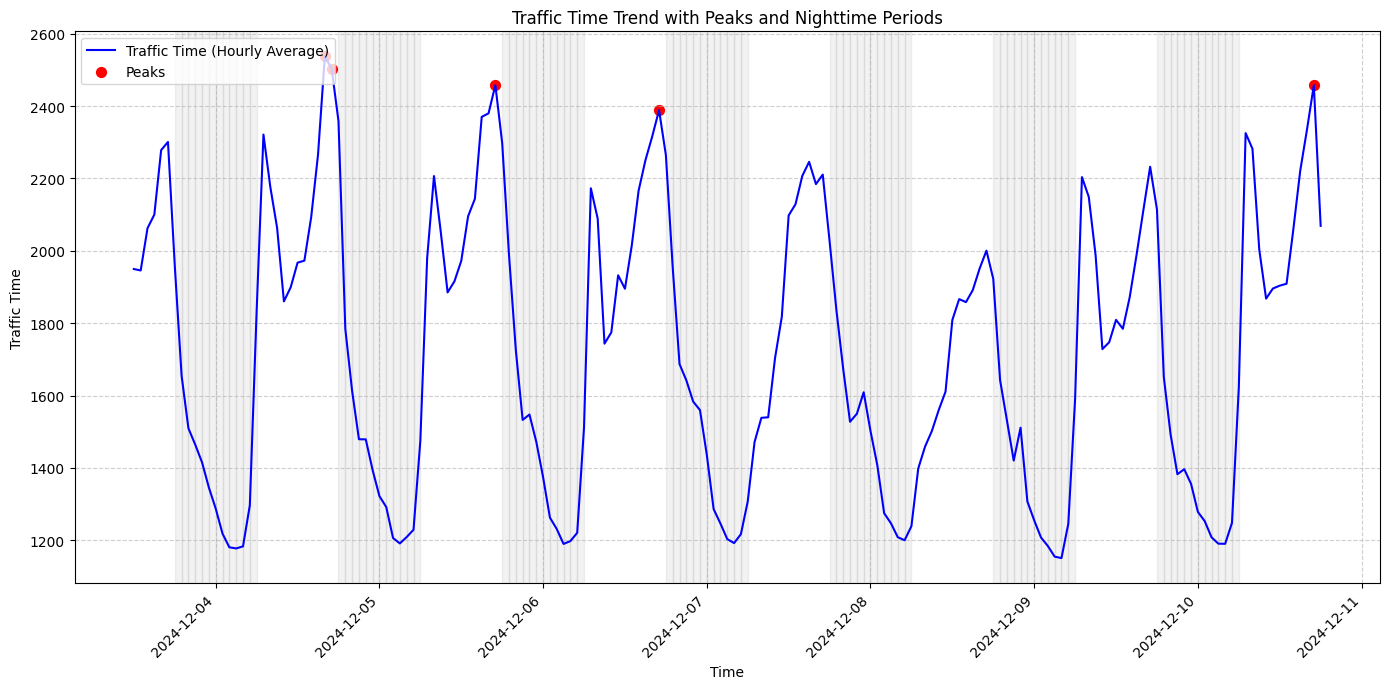

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is in a DataFrame called `data`
# Replace this with your actual DataFrame


# Select relevant columns and ensure numeric values
data_numeric = filtered_data[['timestamp', 'traffic_data.duration_in_traffic']].copy()
data_numeric['traffic_data.duration_in_traffic'] = pd.to_numeric(data_numeric['traffic_data.duration_in_traffic'], errors='coerce')

# Resample the data for smoother trends (e.g., hourly averages)
data_resampled = data_numeric.set_index('timestamp').resample('1H').mean().reset_index()

# Plot traffic time with enhancements
plt.figure(figsize=(14, 7))  # Larger figure for better readability
plt.plot(data_resampled['timestamp'], data_resampled['traffic_data.duration_in_traffic'], label='Traffic Time (Hourly Average)', color='blue', linewidth=1.5)

# Highlight peaks (optional)
peak_indices = data_resampled['traffic_data.duration_in_traffic'].nlargest(5).index
plt.scatter(
    data_resampled.loc[peak_indices, 'timestamp'],
    data_resampled.loc[peak_indices, 'traffic_data.duration_in_traffic'],
    color='red', s=50, label='Peaks'
)

# Shade nighttime periods (e.g., 6 PM to 6 AM)
for i in range(len(data_resampled['timestamp']) - 1):  # Adjust loop range
    if data_resampled['timestamp'][i].hour >= 18 or data_resampled['timestamp'][i].hour < 6:
        plt.axvspan(
            data_resampled['timestamp'][i], 
            data_resampled['timestamp'][i + 1], 
            color='gray', alpha=0.1, label='Nighttime' if i == 0 else ""
        )

# Format x-axis for better readability
plt.gcf().autofmt_xdate()  # Automatically format x-axis for datetime
plt.xticks(rotation=45)  # Rotate x-axis labels

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.6)

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Traffic Time')
plt.title('Traffic Time Trend with Peaks and Nighttime Periods')
plt.legend(loc='upper left')

# Ensure proper layout
plt.tight_layout()

# Show plot
plt.show()


/var/folders/ws/mh28fybn6dq48jvryxctyt2r0000gn/T/ipykernel_74855/1934287800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['air_quality_smoothed'] = filtered_data['air_quality_data.air_quality_index'].rolling(window=10).mean()


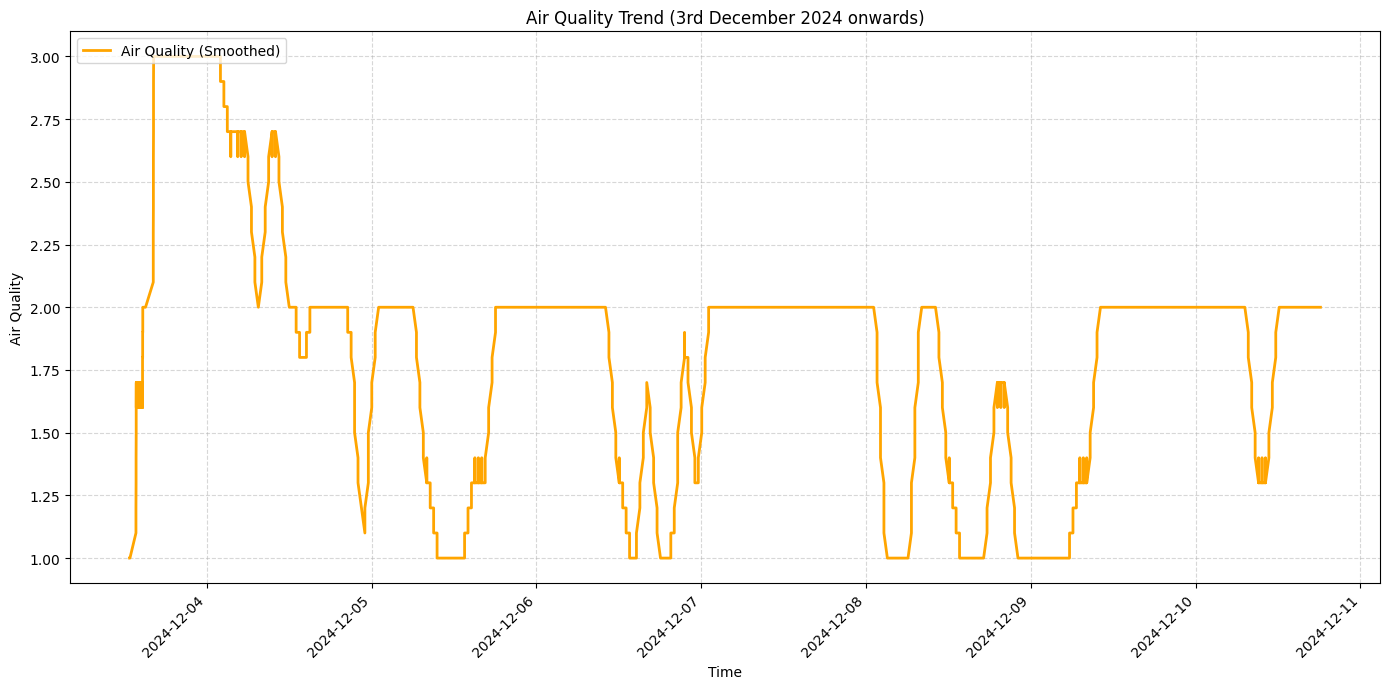

In [60]:
import matplotlib.pyplot as plt

# Apply rolling average for smoother trends
filtered_data['air_quality_smoothed'] = filtered_data['air_quality_data.air_quality_index'].rolling(window=10).mean()

# Plot the Air Quality trend
plt.figure(figsize=(14, 7))  # Larger figure for readability
plt.plot(
    filtered_data['timestamp'], 
    filtered_data['air_quality_smoothed'], 
    label='Air Quality (Smoothed)', 
    color='orange', 
    linewidth=2, 
    linestyle='-'
)

# Add gridlines for readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add labels, title, and legend
plt.xlabel('Time')
plt.ylabel('Air Quality')
plt.title('Air Quality Trend (3rd December 2024 onwards)')
plt.legend(loc='upper left')

# Format x-axis for better readability
plt.gcf().autofmt_xdate()  # Auto format x-axis for datetime
plt.xticks(rotation=45)

# Ensure layout is adjusted to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/ws/mh28fybn6dq48jvryxctyt2r0000gn/T/ipykernel_74855/583091660.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['AQI_bins'] = pd.cut(filtered_data['air_quality_data.air_quality_index'], bins=5)
/var/folders/ws/mh28fybn6dq48jvryxctyt2r0000gn/T/ipykernel_74855/583091660.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Traffic_bins'] = pd.cut(filtered_data['traffic_data.duration_in_traffic'], bins=5)
/var/folders/ws/mh28fybn6dq48jvryxctyt2r0000gn/T/ipykernel_74855

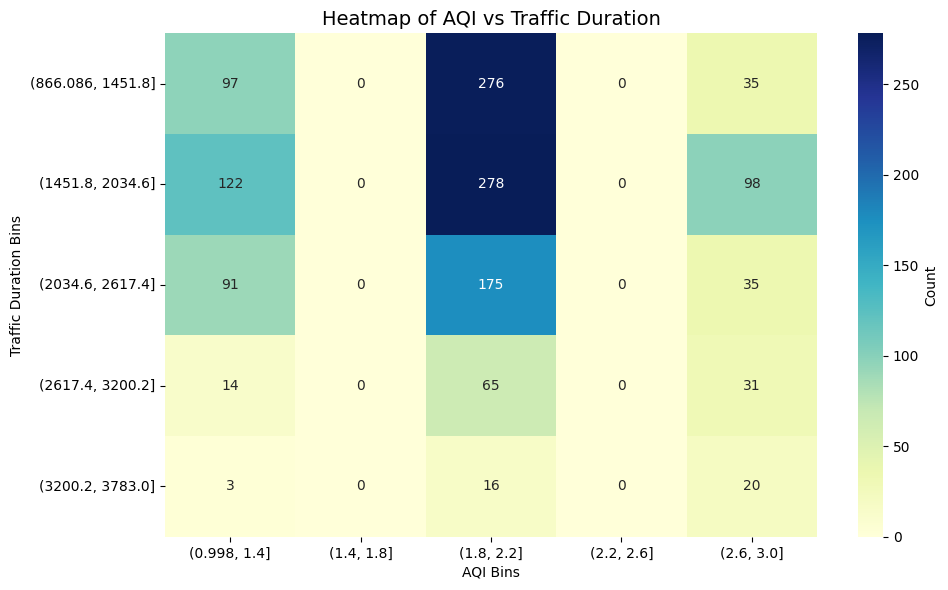

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate data by AQI and Traffic Duration
# Bin AQI and Traffic Duration for grouping
filtered_data['AQI_bins'] = pd.cut(filtered_data['air_quality_data.air_quality_index'], bins=5)
filtered_data['Traffic_bins'] = pd.cut(filtered_data['traffic_data.duration_in_traffic'], bins=5)

# Create a pivot table for the heatmap
heatmap_data = filtered_data.pivot_table(
    index='Traffic_bins', 
    columns='AQI_bins', 
    values='traffic_data.duration_in_traffic', 
    aggfunc='count'
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data, 
    cmap="YlGnBu", 
    annot=True, 
    fmt='d', 
    cbar_kws={'label': 'Count'}
)

# Add labels and title
plt.title('Heatmap of AQI vs Traffic Duration', fontsize=14)
plt.xlabel('AQI Bins')
plt.ylabel('Traffic Duration Bins')

# Show the plot
plt.tight_layout()
plt.show()
